In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Add the root directory of the package to sys.path
sys.path.append('/Users/zzhang/Workspace/SpyDust/')
sys.path.append('../')

In [2]:
## Data from Roke et al. 2025

Hii_catalogue = [
    [43.3, 0.57],
    [22.1, 0.57],
    [21.5, 0.60],
    [28.4, 0.57],
    [26.6, 0.62],
    [20.7, 0.70],
    [24.1, 0.57],
    [62.0, 0.84],
    [42.4, 0.44],
    [23.4, 0.55],
    [19.0, 0.75],
    [22.5, 0.70],
    [48.6, 0.69],
    [22.3, 0.68]
]

MC_catalogue = [[21.3, 0.53], 
                [24.3, 0.78],
                [18.9, 0.46],
                [15.3, 0.59],
                [17.5, 0.57],
                [17.8, 0.47],
                [32.6, 0.65],
                [23.4, 0.51],
                [20.3, 0.60],
                [25.4, 0.72],
                [18.8, 0.58],
                [19.4, 0.68],
                [19.6, 0.89],
                [24.8, 0.48],
                [21.3, 0.62],
                [23.0, 0.50],
                [18.4, 0.58],
                [20.3, 0.57],
                [28.9, 0.53],
                [28.2, 0.53]]

DC_catalogue = [[25.7, 0.59], 
                [18.3, 0.58],
                [16.5, 0.70],
                [21.8, 0.57],
                [18.2, 0.64],
                [18.7, 0.66],
                [21.7, 0.68],
                [22.7, 0.66],
                [23.3, 0.54],
                [21.7, 0.57],
                [26.2, 0.54],
                [20.2, 0.59],
                [14.7, 0.52],
                [16.4, 0.68],
                [24.4, 0.49],
                [26.7, 0.64],
                [16.3, 0.52],
                [18.4, 0.64],
                [20.8, 0.64],
                [23.4, 0.41],
                [19.6, 0.89],
                [18.3, 0.43],
                [19.1, 0.53],
                [20.1, 0.59],
                [19.8, 0.64],
                [22.4, 0.47],
                [20.9, 0.57],
                [26.6, 0.59],
                [19.1, 0.51],
                [18.1, 0.54],
                [27.1, 0.96],
                [25.2, 0.58],
                [23.5, 0.49],
                [23.7, 0.45],
                [25.1, 0.65],
                [19.4, 0.52],
                [20.7, 0.69],
                [17.8, 0.47],
                [20.3, 0.68],
                [24.2, 0.49]
                ]

DC_catalogue = np.array(DC_catalogue)

MC_catalogue = np.array(MC_catalogue)

Hii_catalogue = np.array(Hii_catalogue)

In [3]:
import functools

import SpyDust.Grain as Grain
from SpyDust.SpyDust import SpyDust_given_grain_size_shape
from SpyDust.util import makelogtab


DC_params = {'nh' : 1e4, 'T': 10., 'Chi': 1e-4, 'xh': 0., 'xC': 1e-6, 'y' : 0.999,  'gamma': 0, 'dipole': 9.3, 'line':7}

MC_params = {'nh' : 3e2, 'T': 20., 'Chi': 1e-2, 'xh': 0., 'xC': 1e-4, 'y' : 0.99,  'gamma': 0, 'dipole': 9.3, 'line':7}    

CNM_params = {'nh' : 30, 'T': 100., 'Chi': 1, 'xh': 1.2e-3, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WNM_params = {'nh' : 0.4, 'T': 6000., 'Chi': 1., 'xh': 0.1, 'xC': 3e-4, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

WIM_params = {'nh' : 0.1, 'T': 8000., 'Chi': 1., 'xh': 0.99, 'xC': 1e-3, 'y' : 0, 'gamma': 0, 'dipole': 9.3, 'line':7}

RN_params = {'nh' : 1000., 'T': 100., 'Chi': 1000., 'xh': 0.001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

PDR_params = {'nh' : 1e5, 'T': 300., 'Chi': 3000., 'xh': 0.0001, 'xC': 2e-4, 'y' : 0.5, 'gamma': 0, 'dipole': 9.3, 'line':7}

Hii_params = {'nh' : 1e4, 'T': 1e4, 'Chi': 1e4, 'xh': 0.999, 'xC': 1e-4, 'y' : 0,  'gamma': 0, 'dipole': 9.3, 'line':7}


a_min=3e-8
a2=6.0e-8
a_max=3.5e-7

Num_a = 80
Num_beta = 80

a_tab = makelogtab(a_min, a_max, Num_a)

beta_tab_disk = np.linspace(-0.48, -0.2, Num_beta)
beta_tab_ellip = np.linspace(-0.2, 0.2, Num_beta)

def cache_last_call(func):
    last_args = {"args": None, "kwargs": None, "result": None}

    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        # Compare with last args
        if (last_args["args"] is not None 
            and len(args) == len(last_args["args"]) 
            and all(np.array_equal(a, b) if isinstance(a, np.ndarray) else a == b
                    for a, b in zip(args, last_args["args"])) 
            and kwargs == last_args["kwargs"]):
            return last_args["result"]

        # Otherwise, compute new
        result = func(*args, **kwargs)
        last_args["args"] = args
        last_args["kwargs"] = kwargs
        last_args["result"] = result
        return result

    return wrapper

@cache_last_call
def generate_same_grains_SED(env, a, beta, a2):
    # if "a" is a number, return a single SED result; if "a" is a table, return a table of SED results
    if isinstance(a, (int, float)):
        result = SpyDust_given_grain_size_shape(env, a, beta, 
                                                min_freq=0.1, max_freq=100.0, n_freq=200,
                                                N_angular_Omega=500,
                                                a2=a2
                                                )
        result_SED = result[1]
    else:
        result_SED = []
        for a_val in a:
            result = SpyDust_given_grain_size_shape(env, a_val, beta, 
                                                min_freq=0.1, max_freq=100.0, n_freq=200,
                                                N_angular_Omega=500,
                                                a2=a2)
            result_SED.append(result[1])
        result_SED = np.array(result_SED)

    freqs = result[0]
    return freqs, result_SED

def SED_list_given_SSE(a_beta_tab, env, a2):   
    # generate the SED list given the tables of grain size (S) a_tab, grain shape (S) beta_tab, and the environment (E)
    SED_list = []
    from tqdm import tqdm
    for a, beta in tqdm(a_beta_tab):
        freqs, result = generate_same_grains_SED(env, a, beta, a2=a2)
        SED_list.append(result)
    return freqs,np.array(SED_list)

l_a computed
readPAH computed
Loaded previously computed Jpeisrf arrays from file.
Tev table already exists at /Users/zzhang/Workspace/SpyDust/SpyDust/Data_Files/Tev_30a_30chi.txt.
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
I(Zg<0, parabolic) stored
I(rot, e, Zg <> 0) stored
Gaunt factor stored


/Users/zzhang/Workspace/SpyDust/SpyDust/free_free.py:27: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(gff_data_file, delim_whitespace=True, comment=';', header=None, names=['gamma2', 'u', 'gff'])


In [4]:
env = DC_params
beta_tab = beta_tab_ellip
a_beta_tab_ellip = np.array(np.meshgrid(a_tab, beta_tab)).T.reshape(-1, 2)

freqs, DC_SEDs_ellip =  SED_list_given_SSE(a_beta_tab_ellip, env, 
                                            a2=a_min*0.9) # non-tumbling ellipsoidal grains


100%|██████████| 6400/6400 [13:05<00:00,  8.15it/s]


In [5]:
env = DC_params
beta_tab = beta_tab_disk
a_beta_tab_disk = np.array(np.meshgrid(a_tab, beta_tab)).T.reshape(-1, 2)
freqs, DC_SEDs_disk =  SED_list_given_SSE(a_beta_tab_disk, env, a2=a_max*1.1) # tumbling disk-shaped grains


100%|██████████| 6400/6400 [16:42<00:00,  6.38it/s]


In [6]:
np.save('data/DC_SEDs_ellip.npy', DC_SEDs_ellip)
np.save('data/DC_SEDs_disk.npy', DC_SEDs_disk)
np.save('data/freqs.npy', freqs)


In [7]:
from SpyDust.SED_fit import fit_sed_ensemble

In [8]:
# DC_SEDs_ellip = np.load('data/DC_SEDs_ellip.npy')
# DC_SEDs_disk = np.load('data/DC_SEDs_disk.npy')
# freqs = np.load('data/freqs.npy')

# env = DC_params
# beta_tab = beta_tab_ellip
# a_beta_tab_ellip = np.array(np.meshgrid(a_tab, beta_tab)).T.reshape(-1, 2)
# env = DC_params
# beta_tab = beta_tab_disk
# a_beta_tab_disk = np.array(np.meshgrid(a_tab, beta_tab)).T.reshape(-1, 2)

In [9]:
DC_features_ellip =  fit_sed_ensemble(freqs, DC_SEDs_ellip, thres=1e-3, v2=False)

100%|██████████| 6400/6400 [00:00<00:00, 6718.44it/s]


In [10]:
DC_features_disk =  fit_sed_ensemble(freqs, DC_SEDs_disk, thres=1e-3, v2=False)


100%|██████████| 6400/6400 [00:00<00:00, 6807.67it/s]


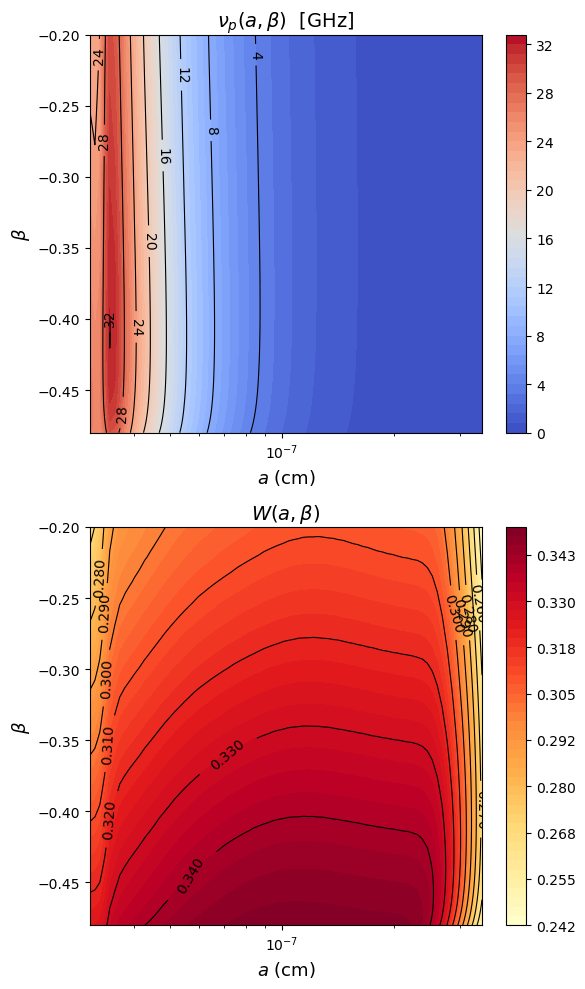

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a_beta_tab = a_beta_tab_disk
features = DC_features_disk


X = a_beta_tab.reshape(Num_a,Num_beta,2)[:, :, 0]
Y = a_beta_tab.reshape(Num_a,Num_beta,2)[:, :, 1]
Z1 = np.exp(features.reshape(Num_a,Num_beta,2)[:, :, 0])
Z2 = features.reshape(Num_a,Num_beta,2)[:, :, 1]

# -------------------------
# Create the plot
# -------------------------
fig, ax = plt.subplots(2, 1, figsize=(6, 10))
ax = ax.flatten()

# Filled heatmap (smooth color shading)
# cmap = plt.cm.viridis
cmap = plt.cm.coolwarm
heat = ax[0].contourf(X, Y, Z1, levels=50, cmap=cmap)

# Contour lines (iso-values)
contours = ax[0].contour(X, Y, Z1, levels=8, colors='black', linewidths=0.8)
ax[0].clabel(contours, inline=True, fontsize=10, fmt="%.0f")

# Colorbar
cbar = fig.colorbar(heat, ax=ax[0])
# cbar.set_label("Function value", fontsize=12)
ax[0].set_xscale('log')

# Axis labels and style
ax[0].set_xlabel(r"$a$ (cm)", fontsize=13)
ax[0].set_ylabel(r"$\beta$", fontsize=13)
ax[0].set_title(fr"$\nu_p(a, \beta)$  [GHz]", fontsize=14)
ax[0].tick_params(labelsize=10)

cmap = plt.cm.YlOrRd
heat = ax[1].contourf(X, Y, Z2, levels=50, cmap=cmap)
contours = ax[1].contour(X, Y, Z2, levels=10, colors='black', linewidths=0.8)
# ax[1].clabel(contours, inline=True, fontsize=10, fmt="%.2f",
#             rightside_up=True, inline_spacing=15)

ax[1].margins(0.05)  # Small margin
levels_to_label = contours.levels[1:-1] if len(contours.levels) > 2 else contours.levels
ax[1].clabel(contours, levels=levels_to_label, inline=True, fontsize=10, fmt="%.3f",
             rightside_up=True)

ax[1].set_xscale('log')

cbar = fig.colorbar(heat, ax=ax[1], format="%.3f")
ax[1].set_xlabel(r"$a$ (cm)", fontsize=13)
ax[1].set_ylabel(r"$\beta$", fontsize=13)
ax[1].set_title(fr"$W(a, \beta)$", fontsize=14)
ax[1].tick_params(labelsize=10)

fig.tight_layout()

plt.savefig("DC_feature_map_disk_given_size_shape.pdf", dpi=300)
plt.show()

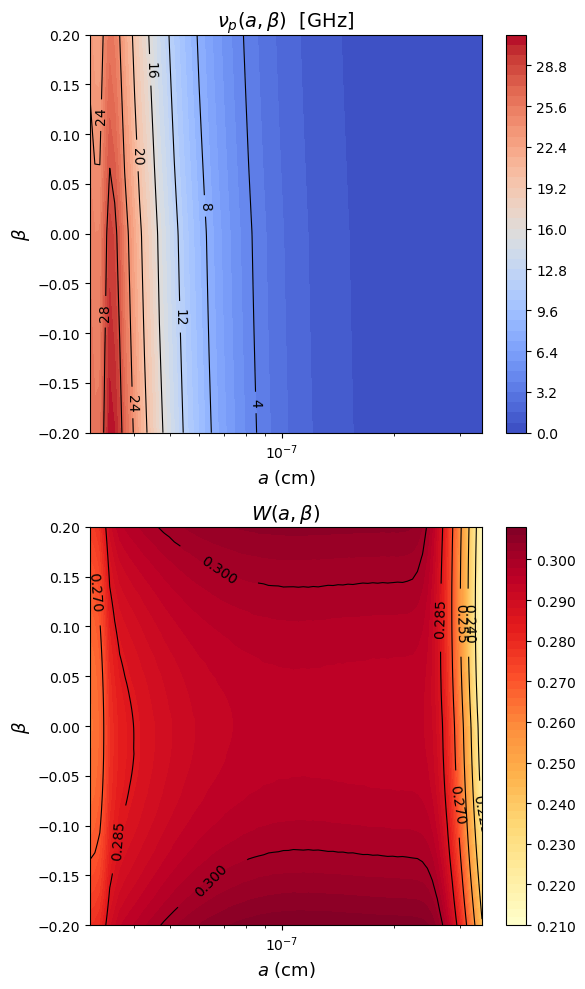

In [12]:
import numpy as np
import matplotlib.pyplot as plt

a_beta_tab = a_beta_tab_ellip
features = DC_features_ellip


X = a_beta_tab.reshape(Num_a,Num_beta,2)[:, :, 0]
Y = a_beta_tab.reshape(Num_a,Num_beta,2)[:, :, 1]
Z1 = np.exp(features.reshape(Num_a,Num_beta,2)[:, :, 0])
Z2 = features.reshape(Num_a,Num_beta,2)[:, :, 1]

# -------------------------
# Create the plot
# -------------------------
fig, ax = plt.subplots(2, 1, figsize=(6, 10))
ax = ax.flatten()

# Filled heatmap (smooth color shading)
# cmap = plt.cm.viridis
cmap = plt.cm.coolwarm
heat = ax[0].contourf(X, Y, Z1, levels=50, cmap=cmap)

# Contour lines (iso-values)
contours = ax[0].contour(X, Y, Z1, levels=8, colors='black', linewidths=0.8)
ax[0].clabel(contours, inline=True, fontsize=10, fmt="%.0f")

# Colorbar
cbar = fig.colorbar(heat, ax=ax[0])
# cbar.set_label("Function value", fontsize=12)
ax[0].set_xscale('log')

# Axis labels and style
ax[0].set_xlabel(r"$a$ (cm)", fontsize=13)
ax[0].set_ylabel(r"$\beta$", fontsize=13)
ax[0].set_title(fr"$\nu_p(a, \beta)$  [GHz]", fontsize=14)
ax[0].tick_params(labelsize=10)

cmap = plt.cm.YlOrRd
heat = ax[1].contourf(X, Y, Z2, levels=50, cmap=cmap)
contours = ax[1].contour(X, Y, Z2, levels=7, colors='black', linewidths=0.8)
# ax[1].clabel(contours, inline=True, fontsize=10, fmt="%.2f",
#             rightside_up=True, inline_spacing=15)

ax[1].margins(0.05)  # Small margin
levels_to_label = contours.levels[1:-1] if len(contours.levels) > 2 else contours.levels
ax[1].clabel(contours, levels=levels_to_label, inline=True, fontsize=10, fmt="%.3f",
             rightside_up=True, inline_spacing=10)

ax[1].set_xscale('log')

cbar = fig.colorbar(heat, ax=ax[1], format="%.3f")
ax[1].set_xlabel(r"$a$ (cm)", fontsize=13)
ax[1].set_ylabel(r"$\beta$", fontsize=13)
ax[1].set_title(fr"$W(a, \beta)$", fontsize=14)
ax[1].tick_params(labelsize=10)

fig.tight_layout()

plt.savefig("DC_feature_map_ellip_given_size_shape.pdf", dpi=300)
plt.show()

# Emulator

In [13]:
import MomentEmu
# Reload the module to reflect recent changes
import importlib
importlib.reload(MomentEmu)
from MomentEmu import PolyEmu


In [14]:
def generate_random_a_beta_tab(n_samples, a_min=a_min, a_max=a_max, beta_min=-0.48, beta_max=0.2):
    a_random = np.random.uniform(low=a_min, high=a_max, size=n_samples)
    beta_random = np.random.uniform(low=beta_min, high=beta_max, size=n_samples)
    return np.array(list(zip(a_random, beta_random)))

test_a_beta_tab_disk = generate_random_a_beta_tab(1000, a_min=a_min, a_max=a_max, beta_min=-0.48, beta_max=-0.2)
test_a_beta_tab_ellip = generate_random_a_beta_tab(1000, a_min=a_min, a_max=a_max, beta_min=-0.2, beta_max=0.2)

freqs, test_DC_SEDs_ellip =  SED_list_given_SSE(test_a_beta_tab_ellip, DC_params, a2=a_min*0.9)
freqs, test_DC_SEDs_disk =  SED_list_given_SSE(test_a_beta_tab_disk, DC_params, a2=a_max*1.1)

test_DC_features_ellip = fit_sed_ensemble(freqs, test_DC_SEDs_ellip, thres=1e-3, v2=False)
test_DC_features_disk = fit_sed_ensemble(freqs, test_DC_SEDs_disk, thres=1e-3, v2=False)

100%|██████████| 1000/1000 [00:00<00:00, 6730.02it/s]


In [15]:
# Create emulator with both forward and inverse capabilities
DC_feature_disk_single = PolyEmu(
    a_beta_tab_disk,      # Input parameter samples (grain size and shape)
    DC_features_disk, 
    X_test=test_a_beta_tab_disk,
    Y_test=test_DC_features_disk,
    forward=True,              # Enable forward emulation: parameters → observables
    max_degree_forward=25,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
    RMSE_lower=0.01,
    fRMSE_tol=1e-1,
    return_max_frac_err=True
)

Generating forward emulator...
Candidate models within 10.0% of min RMSE : [12 13 14]
RMSE of candidate models : [0.01317578 0.01325555 0.01243315]
Selected best model index based on BIC : 14
Forward emulator generated with degree 17, RMSE_val of 0.012433150137209128.
Performing dimension reduction...
Dimension reduced  from 171 modes to 166 modes.
After the dimension reduction, the RMSE: 0.01222938669197332, AIC: -8475.826956751758, BIC: -54915.25968049953
Forward emulator maximum fractional error: 0.06990589811261744. (If the true value is close to 0, this value could be extremely large. This is fine.)


In [16]:
# Create emulator with both forward and inverse capabilities
DC_feature_ellip_single = PolyEmu(
    a_beta_tab_ellip,      # Input parameter samples (grain size and shape)
    DC_features_ellip, 
    X_test=test_a_beta_tab_ellip,
    Y_test=test_DC_features_ellip,
    forward=True,              # Enable forward emulation: parameters → observables
    max_degree_forward=25,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
    RMSE_lower=0.01,
    fRMSE_tol=1e-1,
    return_max_frac_err=True
)

Generating forward emulator...


Candidate models within 10.0% of min RMSE : [12 13 14]
RMSE of candidate models : [0.02127914 0.02085717 0.0216196 ]
Selected best model index based on BIC : 13
Forward emulator generated with degree 16, RMSE_val of 0.020857167727263058.
Performing dimension reduction...
Dimension reduced  from 153 modes to 149 modes.
After the dimension reduction, the RMSE: 0.02087250353314915, AIC: -7440.645213246414, BIC: -48221.485427644235
Forward emulator maximum fractional error: 0.7226132610436851. (If the true value is close to 0, this value could be extremely large. This is fine.)


## Distribution of grain size

In [17]:
import SpyDust.Grain as Grain


def eval_beta_arbitrary(a, d):
    if a <= a2:
        beta_val = Grain.cylindrical_params(a, d)[1]
    else:
        beta_val=0.
    return beta_val

def _normalise(w):
    """Turn any non-negative weight array into a PDF."""
    w = np.asarray(w, dtype=float)
    if np.any(w < 0):                       # sanity check
        raise ValueError("Weights must be non-negative.")
    s = w.sum()
    if s == 0:
        raise ValueError("All weights are zero → cannot normalise.")
    return w / s

# a_list = np.concatenate((a_tab_disk, a_tab_ellip))
a_list = a_tab

def grain_size_dist(gamma, log_a0, sigma):
    """
    dn/da propto exp[(gamma - 1) lna - 1/2 ((ln(a) - ln(a0) + sigma**2/2)^2 / sigma^2)]
    equivalent to
    dn/dlna propto exp[gamma * lna - 1/2 ((ln(a) - ln(a0) + sigma**2/2)^2 / sigma^2)]
    """
    ln_a_list = np.log(a_list)
    exponent = gamma  * ln_a_list - 0.5 * ( (ln_a_list - log_a0 + sigma**2/2) / sigma ) ** 2
    max_exponent = np.max(exponent)
    exponent -= max_exponent
    weights = np.exp(exponent)
    dln_a_1 =  ln_a_list[1] - ln_a_list[0]
    dln_a_2 =  ln_a_list[-1] - ln_a_list[-2]
    assert np.isclose(dln_a_1, dln_a_2), "a_list not evenly spaced in log-space"
    return _normalise(weights)

def grain_shape_dist(a, d, delta):
    beta_tab = beta_tab_disk
    ln_beta_t_tab = np.log( beta_tab + 0.5 )
    ln_beta_d_t = np.log( eval_beta_arbitrary(a, d) + 0.5 )
    exponent = - ln_beta_t_tab - 0.5 * ( (ln_beta_t_tab  - ln_beta_d_t + delta**2/2 ) / delta ) ** 2
    max_exponent = np.max(exponent)
    exponent -= max_exponent
    weights = np.exp(exponent)
    return _normalise(weights)

aux = np.where(a_tab <= a2)
Num_a_disk = aux[0].size
a_tab_disk = a_tab[:Num_a_disk]
a_tab_ellip = a_tab[Num_a_disk:]

def generate_size_shape_dist(gamma, log_a0, sigma, d, delta):
    distr_a_beta_disk = np.zeros((Num_a_disk, Num_beta))

    distr_a = grain_size_dist(gamma, log_a0, sigma)
    distr_a_disk = distr_a[:Num_a_disk]
    distr_a_ellip = distr_a[Num_a_disk:]

    for i in range(Num_a_disk):
        a = a_tab[i]
        distr_a_beta_disk[i, :] = grain_shape_dist(a, d, delta) * distr_a_disk[i]

    return distr_a_beta_disk, distr_a_ellip
    

In [18]:
# Generate SEDs for larger, spherical grains (beta=0)

a_beta_tab_sphe = []
for a in a_tab_ellip:
    a_beta_tab_sphe.append([a, 0.])
a_beta_tab_sphe = np.array(a_beta_tab_sphe)

freqs, DC_SEDs_sphe =  SED_list_given_SSE(a_beta_tab_sphe, DC_params, a2=a2)

# Generate SEDs for smaller, disk-like grains
a_beta_tab_small = np.array(np.meshgrid(a_tab_disk, beta_tab)).T.reshape(-1, 2)
freqs, DC_SEDs_small =  SED_list_given_SSE(a_beta_tab_small, DC_params, a2=a2)


100%|██████████| 1840/1840 [04:44<00:00,  6.47it/s]


In [19]:
def synthesize_SED(gamma, log_a0, sigma, d, delta):
    distr_a_beta_disk, distr_a_ellip = generate_size_shape_dist(gamma, log_a0, sigma, d, delta)
    SED_disk = np.sum(distr_a_beta_disk[:, :, np.newaxis] * DC_SEDs_small.reshape(Num_a_disk,Num_beta,-1), 
                        axis=(0, 1))
    SED_ellip = np.sum(distr_a_ellip[:, np.newaxis] * DC_SEDs_sphe, axis=0)
    return SED_disk + SED_ellip

In [20]:
# reference values of the parameters:
gamma_ref, log_a0_ref, sigma_ref, d_ref, delta_ref = 0., np.log(a2), 0.5, Grain.d, 0.01


In [21]:
# from SpyDust.SED_fit import measure_sed_peak_properties
# Reload the module and SED fitting function
import importlib
import SpyDust
importlib.reload(SpyDust.SED_fit)
from SpyDust.SED_fit import measure_sed_peak_properties



[6.3661037e-08 0.0000000e+00]


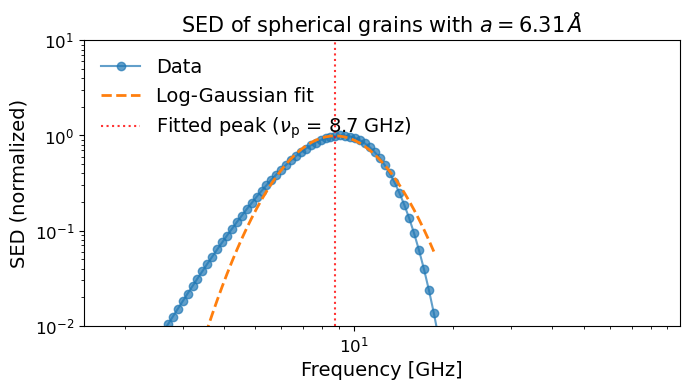

{'f_peak': np.float64(8.737583777162422),
 'sigma': np.float64(0.2930093894483819),
 'fwhm': np.float64(6.149100894263142),
 'r_squared': np.float64(0.9842512677454274),
 'amplitude': np.float64(8.083592728071658e-12),
 'f_peak_error': np.float64(0.04233390372471456),
 'sigma_error': np.float64(0.004895530326894812),
 'n_points_used': 55,
 'threshold_value': np.float64(8.150429610950903e-14)}

In [22]:
ind=1
print(a_beta_tab_sphe[ind])
measure_sed_peak_properties(freqs, DC_SEDs_sphe[ind], plot=True, save_path="DC_SED_sphe_fit_example.pdf", thres=1e-2, title='SED of spherical grains with $a=6.31\\, \\AA$', v2=False)


[ 3.04641926e-08 -4.76455696e-01]


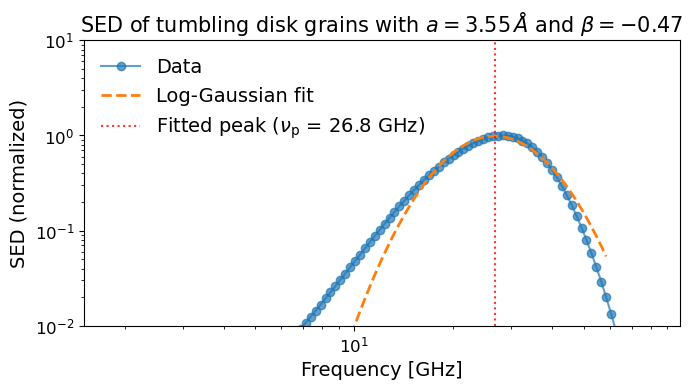

{'f_peak': np.float64(26.773813952214525),
 'sigma': np.float64(0.3243752132667996),
 'fwhm': np.float64(20.951871135412233),
 'r_squared': np.float64(0.9844084573833609),
 'amplitude': np.float64(2.6874439870077036e-11),
 'f_peak_error': np.float64(0.13497585783815888),
 'sigma_error': np.float64(0.0050714961132815005),
 'n_points_used': 63,
 'threshold_value': np.float64(2.7298957488755563e-13)}

In [23]:
ind=1
print(a_beta_tab_disk[ind])
measure_sed_peak_properties(freqs, DC_SEDs_disk[ind], plot=True, save_path="DC_SED_disk_fit_example.pdf", thres=1e-2, title='SED of tumbling disk grains with $a=3.55\\, \\AA$ and $\\beta=-0.47$', v2=False)

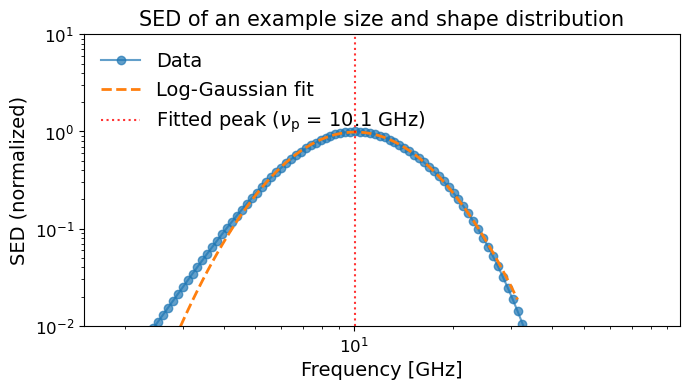

{'f_peak': np.float64(10.073704962012743),
 'sigma': np.float64(0.4040361199755817),
 'fwhm': np.float64(9.950064305309839),
 'r_squared': np.float64(0.9991260894635899),
 'amplitude': np.float64(6.5565034152748825e-12),
 'f_peak_error': np.float64(0.013333247869298123),
 'sigma_error': np.float64(0.0013251884390824745),
 'n_points_used': 75,
 'threshold_value': np.float64(6.640487651120523e-14)}

In [24]:
import importlib
import SpyDust.SED_fit
importlib.reload(SpyDust.SED_fit)
from SpyDust.SED_fit import measure_sed_peak_properties

SED_ref = synthesize_SED(gamma_ref, log_a0_ref, 0.1, d_ref, delta_ref)
measure_sed_peak_properties(freqs, SED_ref, plot=True, save_path="DC_SED_eg_dist_fit.pdf", thres=1e-2, title='SED of an example size and shape distribution', v2=False)

In [25]:
gamma_list = np.linspace(-2.5, 2, 100)
log_a0_list = np.linspace(np.log(a_min), np.log(a_max), 100)
sigma_list = makelogtab(0.01, 10, 100)
d_list = np.linspace(Grain.d/2, Grain.d*2, 100)
delta_list = makelogtab(0.001, 1, 100)

In [26]:

SED_gamma_list = []
for gamma in gamma_list:
    SED_gamma_list.append(synthesize_SED(gamma, log_a0_ref, sigma_ref, d_ref, delta_ref))
SED_gamma_list = np.array(SED_gamma_list)

SED_log_a0_list = []
for log_a0 in log_a0_list:
    SED_log_a0_list.append(synthesize_SED(gamma_ref, log_a0, sigma_ref, d_ref, delta_ref))
SED_log_a0_list = np.array(SED_log_a0_list)

SED_sigma_list = []
for sigma in sigma_list:
    SED_sigma_list.append(synthesize_SED(gamma_ref, log_a0_ref, sigma, d_ref, delta_ref))
SED_sigma_list = np.array(SED_sigma_list)

SED_d_list = []
for d in d_list:
    SED_d_list.append(synthesize_SED(gamma_ref, log_a0_ref, sigma_ref, d, delta_ref))
SED_d_list = np.array(SED_d_list)

SED_delta_list = []
for delta in delta_list:
    SED_delta_list.append(synthesize_SED(gamma_ref, log_a0_ref, sigma_ref, d_ref, delta))
SED_delta_list = np.array(SED_delta_list)


In [27]:
SED_gamma_features = fit_sed_ensemble(freqs, SED_gamma_list, thres=1e-3, v2=False)

SED_log_a0_features = fit_sed_ensemble(freqs, SED_log_a0_list, thres=1e-3, v2=False)

SED_sigma_features = fit_sed_ensemble(freqs, SED_sigma_list, thres=1e-3, v2=False)

SED_d_features = fit_sed_ensemble(freqs, SED_d_list, thres=1e-3, v2=False)

SED_delta_features = fit_sed_ensemble(freqs, SED_delta_list, thres=1e-3, v2=False)


100%|██████████| 100/100 [00:00<00:00, 4343.05it/s]


In [28]:
SED_ref = synthesize_SED(gamma_ref, log_a0_ref, sigma_ref, d_ref, delta_ref)

SED_ref_features = fit_sed_ensemble(freqs, SED_ref, thres=1e-3, v2=False)

100%|██████████| 1/1 [00:00<00:00, 2168.72it/s]


In [29]:
SED_ref_features

array([3.15647739, 0.46890403])

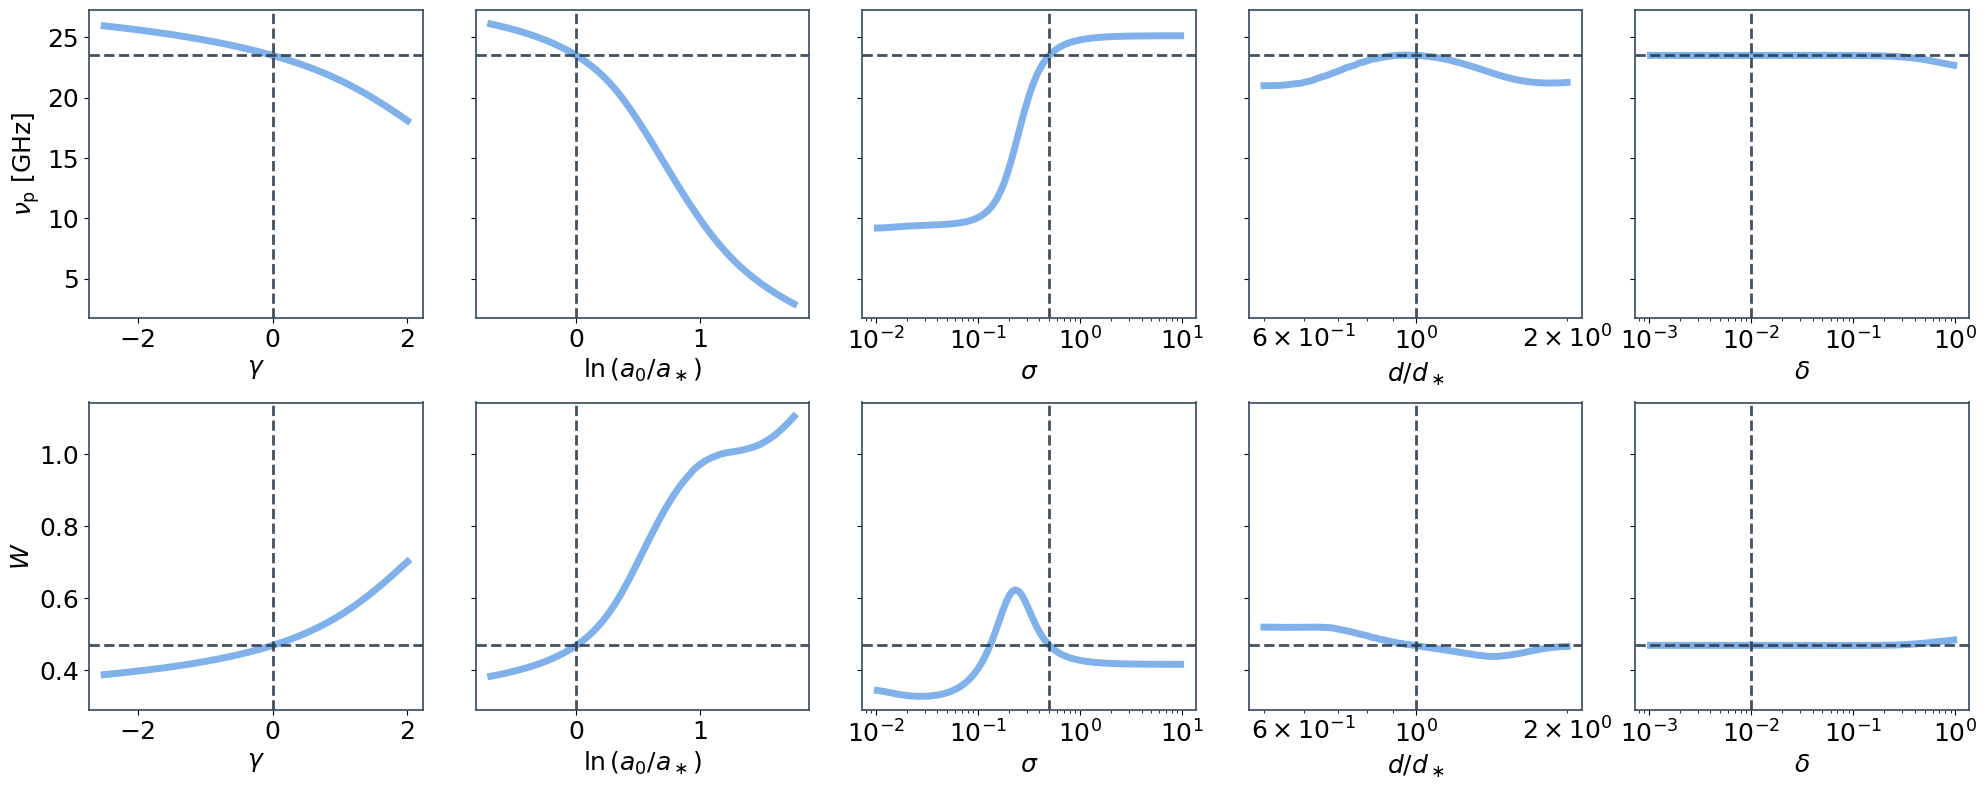

In [30]:
import matplotlib.pyplot as plt

# Create figure with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharey='row')

# Define improved styling
curve_color = '#4A90E2'  # Light blue
curve_alpha = 0.7
curve_linewidth = 5
ref_color = '#2C3E50'  # Dark blue-gray
ref_linewidth = 2
ref_alpha = 0.9

# First row - nu_p [GHz] (exponential of first feature)
axes[0, 0].plot(gamma_list, np.exp(SED_gamma_features[:, 0]), 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[0, 0].set_xlabel(r'$\gamma$')
# show the reference value
axes[0, 0].axvline(gamma_ref, color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[0, 0].axhline(np.exp(SED_ref_features[0]), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[0, 1].plot(log_a0_list - np.log(a2), np.exp(SED_log_a0_features[:, 0]), 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[0, 1].set_xlabel(r'$\ln{{(a_0 / a_\ast)}}$')
# show the reference value
axes[0, 1].axvline(log_a0_ref - np.log(a2), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[0, 1].axhline(np.exp(SED_ref_features[0]), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[0, 2].plot(sigma_list, np.exp(SED_sigma_features[:, 0]), 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[0, 2].set_xscale('log')
axes[0, 2].set_xlabel(r'$\sigma$')
# show the reference value
axes[0, 2].axvline(sigma_ref, color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[0, 2].axhline(np.exp(SED_ref_features[0]), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[0, 3].plot(d_list/d_ref, np.exp(SED_d_features[:, 0]), 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[0, 3].set_xlabel(r'$d/d_\ast$')
axes[0, 3].set_xscale('log')
# show the reference value
axes[0, 3].axvline(1., color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[0, 3].axhline(np.exp(SED_ref_features[0]), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[0, 4].plot(delta_list, np.exp(SED_delta_features[:, 0]), 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[0, 4].set_xscale('log')
axes[0, 4].set_xlabel(r'$\delta$')
# show the reference value
axes[0, 4].axvline(delta_ref, color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[0, 4].axhline(np.exp(SED_ref_features[0]), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

# Set shared y-label for first row
axes[0, 0].set_ylabel(r'$\nu_{\rm p}$ [GHz]')

# Second row - beta (second feature)
axes[1, 0].plot(gamma_list, SED_gamma_features[:, 1], 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[1, 0].set_xlabel(r'$\gamma$')
axes[1, 0].axvline(gamma_ref, color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[1, 0].axhline(SED_ref_features[1], color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[1, 1].plot(log_a0_list - np.log(a2), SED_log_a0_features[:, 1], 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[1, 1].set_xlabel(r'$\ln{{(a_0 / a_\ast)}}$')
# show the reference value
axes[1, 1].axvline(log_a0_ref - np.log(a2), color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[1, 1].axhline(SED_ref_features[1], color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[1, 2].plot(sigma_list, SED_sigma_features[:, 1], 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[1, 2].set_xscale('log')
axes[1, 2].set_xlabel(r'$\sigma$')
# show the reference value
axes[1, 2].axvline(sigma_ref, color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[1, 2].axhline(SED_ref_features[1], color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[1, 3].plot(d_list / d_ref, SED_d_features[:, 1], 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[1, 3].set_xlabel(r'$d/d_\ast$')
axes[1, 3].set_xscale('log')
# show the reference value
axes[1, 3].axvline(1., color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[1, 3].axhline(SED_ref_features[1], color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

axes[1, 4].plot(delta_list, SED_delta_features[:, 1], 
                color=curve_color, alpha=curve_alpha, linewidth=curve_linewidth)
axes[1, 4].set_xscale('log')
axes[1, 4].set_xlabel(r'$\delta$')
# show the reference value
axes[1, 4].axvline(delta_ref, color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)
axes[1, 4].axhline(SED_ref_features[1], color=ref_color, linestyle='--', 
                   linewidth=ref_linewidth, alpha=ref_alpha)

# Set shared y-label for second row
axes[1, 0].set_ylabel(r'$W$')

# Enhanced styling
font_size = 18
for ax in axes.flat:
    ax.tick_params(axis='both', which='both', labelsize=font_size)
    ax.set_title(ax.get_title(), fontsize=font_size)
    ax.set_xlabel(ax.get_xlabel(), fontsize=font_size)
    ax.set_ylabel(ax.get_ylabel(), fontsize=font_size)
    # Add subtle grid for better readability
    # ax.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
    # Improve spine appearance
    for spine in ax.spines.values():
        spine.set_linewidth(1.2)
        spine.set_color('#34495E')

# Adjust layout and show
plt.tight_layout()
plt.savefig("DC_SED_feature_given_distribution.pdf", dpi=300, bbox_inches='tight')
plt.show()

## DC Emulation ...

In [31]:
# Sample the distribution parameter space - drawn randomly for each parameter with a uniform distribution; not sampling d and delta for now
N_samples = 10000
gamma_list = np.random.uniform(-2.5, 2, N_samples)
log_a0_list = np.random.uniform(np.log(a_min)-1, np.log(a_max)+1, N_samples)
sigma_list = np.random.uniform(0.01, 20, N_samples)
param_array_training = np.column_stack((gamma_list, log_a0_list, sigma_list)) # Generate the parameter array (N_samples, 3)


SED_array_training = []
import tqdm
for i in tqdm.tqdm(range(N_samples)):
    SED_array_training.append(synthesize_SED(gamma_list[i], log_a0_list[i], sigma_list[i], d_ref, delta_ref))
SED_array_training = np.array(SED_array_training)
features_training = fit_sed_ensemble(freqs, SED_array_training, thres=1e-3, v2=False)


# Generate the test parameter array (N_samples, 3)
N_samples_test = 2000
gamma_list_test = np.random.uniform(-2.5, 2, N_samples_test)
log_a0_list_test = np.random.uniform(np.log(a_min), np.log(a_max), N_samples_test)
sigma_list_test = np.random.uniform(0.01, 10, N_samples_test)
param_array_test = np.column_stack((gamma_list_test, log_a0_list_test, sigma_list_test))

SED_array_test = []
for i in tqdm.tqdm(range(N_samples_test)):
    SED_array_test.append(synthesize_SED(gamma_list_test[i], log_a0_list_test[i], sigma_list_test[i], d_ref, delta_ref))
SED_array_test = np.array(SED_array_test)
features_test = fit_sed_ensemble(freqs, SED_array_test, thres=1e-3, v2=False)

100%|██████████| 2000/2000 [00:00<00:00, 4655.72it/s]


In [32]:
def calculate_moments(a_dist_weights):
    mean = np.sum(a_dist_weights * a_list)
    variance = np.sum(a_dist_weights * (a_list - mean)**2)
    skewness = np.sum(a_dist_weights * (a_list - mean)**3) / (variance ** 1.5)
    kurtosis = np.sum(a_dist_weights * (a_list - mean)**4) / (variance ** 2)
    fifth_moment = np.sum(a_dist_weights * (a_list - mean)**5) / (variance ** 2.5)
    sixth_moment = np.sum(a_dist_weights * (a_list - mean)**6) / (variance ** 3)
    return [mean, variance, skewness, kurtosis, fifth_moment, sixth_moment]

# Calculate the a-distributions
a_dist_weights_training = []
for i in tqdm.tqdm(range(N_samples)):
    a_dist_weights = grain_size_dist(gamma_list[i], log_a0_list[i], sigma_list[i]) # These are statistical weights for each grain size in a_tab
    a_dist_weights_training.append(a_dist_weights) 
a_dist_weights_training = np.array(a_dist_weights_training)

# For each distribution of a, calculate the moments: mean, variance, skewness, kurtosis, ..., up to 6th order    
a_moments_training = []
for i in tqdm.tqdm(range(N_samples)):
    a_moments = calculate_moments(a_dist_weights_training[i])
    a_moments_training.append(a_moments)
a_moments_training = np.array(a_moments_training)

# Calculate the a-distributions for test set
a_dist_weights_test = []
for i in tqdm.tqdm(range(N_samples_test)):
    a_dist_weights = grain_size_dist(gamma_list_test[i], log_a0_list_test[i], sigma_list_test[i]) # These are statistical weights for each grain size in a_tab
    a_dist_weights_test.append(a_dist_weights) 
a_dist_weights_test = np.array(a_dist_weights_test)

# For each distribution of a, calculate the moments: mean, variance, skewness, kurtosis, ..., up to 6th order    
a_moments_test = []
for i in tqdm.tqdm(range(N_samples_test)):
    a_moments = calculate_moments(a_dist_weights_test[i])
    a_moments_test.append(a_moments)
a_moments_test = np.array(a_moments_test)

100%|██████████| 2000/2000 [00:00<00:00, 63795.58it/s]


In [33]:
# DC_parameters2feature = MomentEmu.PolyEmu(
#     param_array_training,      # Input parameter samples (grain size and shape)
#     features_training, 
#     X_test=param_array_test,
#     Y_test=features_test,
#     forward=True,              # Enable forward emulation: parameters → observables
#     max_degree_forward=25,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
#     backward=True,
#     max_degree_backward=25,    # Max polynomial degree for inverse mapping (observables → parameters)
#     RMSE_lower=0.01,
#     fRMSE_tol=1e-1,
#     return_max_frac_err=True
# )

In [34]:
import copy
# transform the a-distribution moments so that even orders are logarithmic
a_moments_training_transformed = copy.deepcopy(a_moments_training)
# Change unit (from cm) to angstroms for better numerical stability
a_moments_training_transformed[:, 0] *= 1e8   # mean
a_moments_training_transformed[:, 1] *= 1e16  # variance
a_moments_training_transformed[:, 2] *= 1e24  # skewness
a_moments_training_transformed[:, 3] *= 1e32  # kurtosis
a_moments_training_transformed[:, 4] *= 1e40  # fifth moment
a_moments_training_transformed[:, 5] *= 1e48  # sixth moment

# a_moments_training_transformed[:, 0] = np.log(a_moments_training[:, 0])   # log(mean)
# a_moments_training_transformed[:, 1] = np.log(a_moments_training[:, 1])   # log(variance)
# a_moments_training_transformed[:, 3] = np.log(a_moments_training[:, 3])   # log(kurtosis)
# a_moments_training_transformed[:, 5] = np.log(a_moments_training[:, 5])   # log(sixth moment)

a_moments_test_transformed = copy.deepcopy(a_moments_test)
a_moments_test_transformed[:, 0] *= 1e8   # mean
a_moments_test_transformed[:, 1] *= 1e16  # variance
a_moments_test_transformed[:, 2] *= 1e24  # skew
a_moments_test_transformed[:, 3] *= 1e32  # kurtosis
a_moments_test_transformed[:, 4] *= 1e40  # fifth moment
a_moments_test_transformed[:, 5] *= 1e48  # sixth moment

# a_moments_test_transformed[:, 0] = np.log(a_moments_test[:, 0])   # log(mean)
# a_moments_test_transformed[:, 1] = np.log(a_moments_test[:, 1])   # log(variance)
# a_moments_test_transformed[:, 3] = np.log(a_moments_test[:, 3])   # log(kurtosis)
# a_moments_test_transformed[:, 5] = np.log(a_moments_test[:, 5])   # log(sixth moment)

# Create emulator with both forward and inverse capabilities
# for N_moments in range(2, 6):
N_moments = 2
DC_moment2feature = PolyEmu(
    a_moments_training_transformed[:, :N_moments],      # Input parameter samples (grain size and shape)
    features_training, 
    X_test=a_moments_test_transformed[:, :N_moments],
    Y_test=features_test,
    forward=True,              # Enable forward emulation: parameters → observables
    max_degree_forward=25,     # Max polynomial degree for forward mapping (lower for high-dimensional problems)
    backward=True,
    max_degree_backward=25,    # Max polynomial degree for inverse mapping (observables → parameters)
    RMSE_lower=0.01,
    fRMSE_tol=1e-1,
    return_max_frac_err=True,
    RMSE_upper=0.5
)

Generating forward emulator...
Candidate models within 10.0% of min RMSE : [8]
RMSE of candidate models : [0.06715877]
Selected best model index based on BIC : 8
Forward emulator generated with degree 11, RMSE_val of 0.06715877372479423.
Performing dimension reduction...
Dimension reduced  from 78 modes to 78 modes.
After the dimension reduction, the RMSE: 0.06715877372479423, AIC: -10646.782823803587, BIC: -53295.50757000379
Forward emulator maximum fractional error: 0.290645882443594. (If the true value is close to 0, this value could be extremely large. This is fine.)
Generating backward emulator...


Candidate models within 10.0% of min RMSE : [5 6 7]
RMSE of candidate models : [0.2864788  0.28164337 0.27540887]
Selected best model index based on BIC : 7
Backward emulator generated with degree 10, RMSE_val of 0.27540886629805106.
Performing dimension reduction...
Dimension reduced  from 66 modes to 66  modes.
After the dimension reduction, the RMSE: 0.27540886629805106, AIC: -5025.993995799971, BIC: -25182.08751444943
Backward emulator maximum fractional error: 50771.89657576078. (If the true value is close to 0, this value could be extremely large. This is fine.)


In [35]:
DC_catalogue = [[25.7, 0.59], 
                [18.3, 0.58],
                [16.5, 0.70],
                [21.8, 0.57],
                [18.2, 0.64],
                [18.7, 0.66],
                [21.7, 0.68],
                [22.7, 0.66],
                [23.3, 0.54],
                [21.7, 0.57],
                [26.2, 0.54],
                [20.2, 0.59],
                [14.7, 0.52],
                [16.4, 0.68],
                [24.4, 0.49],
                [26.7, 0.64],
                [16.3, 0.52],
                [18.4, 0.64],
                [20.8, 0.64],
                [23.4, 0.41],
                [19.6, 0.89],
                [18.3, 0.43],
                [19.1, 0.53],
                [20.1, 0.59],
                [19.8, 0.64],
                [22.4, 0.47],
                [20.9, 0.57],
                [26.6, 0.59],
                [19.1, 0.51],
                [18.1, 0.54],
                [27.1, 0.96],
                [25.2, 0.58],
                [23.5, 0.49],
                [23.7, 0.45],
                [25.1, 0.65],
                [19.4, 0.52],
                [20.7, 0.69],
                [17.8, 0.47],
                [20.3, 0.68],
                [24.2, 0.49]
                ]

DC_catalogue = np.array(DC_catalogue)

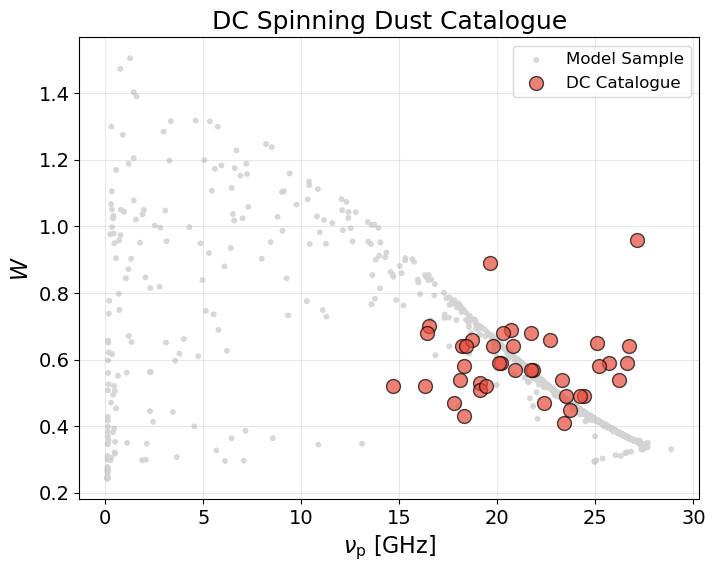

In [36]:
# Make the scatter plot
plt.figure(figsize=(8, 6))

# First, plot the training set features as light background
plt.scatter(np.exp(features_training[:, 0]), features_training[:, 1], 
           color='lightgray', s=18, alpha=0.9, edgecolors='none', 
           label='Model Sample', zorder=1)

# Then plot the DC catalogue on top
plt.scatter(DC_catalogue[:, 0], DC_catalogue[:, 1], 
           color='#E74C3C', s=100, alpha=0.7, edgecolors='k',
           label='DC Catalogue', zorder=2)

plt.xlabel(r'$\nu_{\rm p}$ [GHz]', fontsize=16)
plt.ylabel(r'$W$', fontsize=16)
plt.title('DC Spinning Dust Catalogue', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='both', labelsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=12, framealpha=0.8)

plt.savefig("DC_spinning_dust_catalogue.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# Take the natural logarithm of the first column (nu_p)

import copy
DC_catalogue_transformed = copy.deepcopy(DC_catalogue)
DC_catalogue_transformed[:, 0] = np.log(DC_catalogue_transformed[:, 0])

DC_catelogue_a_moments = DC_moment2feature.backward_emulator(DC_catalogue_transformed)

In [38]:
a_moments_mean = np.mean(a_moments_training, axis=0)
print("Mean of a-distribution moments in training set:", a_moments_mean)

Mean of a-distribution moments in training set: [ 1.08574853e-07  4.71257396e-15 -4.02744306e+02  1.53333318e+09
 -5.99565408e+15  2.34656537e+22]


/var/folders/r5/jq1d5z7917582lhx9y8r4rj80000gn/T/ipykernel_89198/1993326801.py:39: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xlims[0], xlims[1])


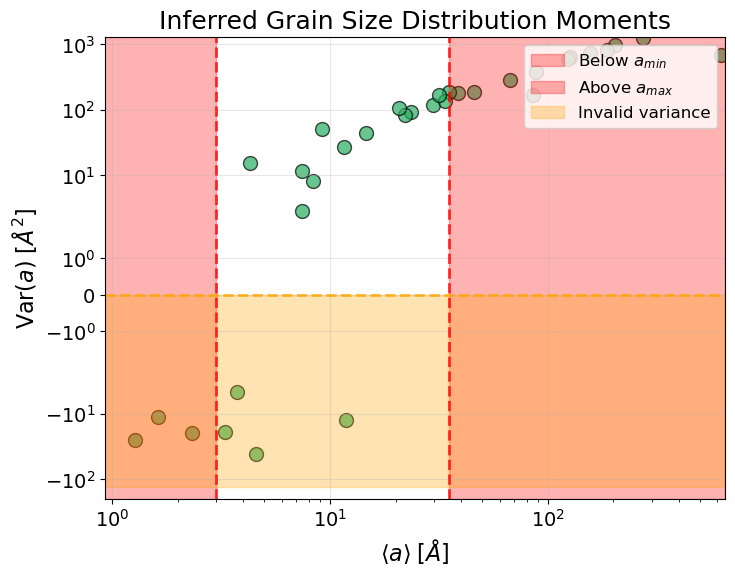

In [39]:
# Make the scatter plot of the first two moments
plt.figure(figsize=(8, 6))
plt.scatter(DC_catelogue_a_moments[:, 0], DC_catelogue_a_moments[:, 1], color='#27AE60', s=100, alpha=0.7, edgecolors='k')

# Add shading for invalid regions
ax = plt.gca()

# Convert a_min and a_max to Angstrom units (multiply by 1e8)
a_min_angstrom = a_min * 1e8
a_max_angstrom = a_max * 1e8

# Get current axis limits for shading
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# Shade region below a_min (left side)
ax.axvspan(xlims[0], a_min_angstrom, alpha=0.3, color='red', label='Below $a_{min}$')

# Shade region above a_max (right side) 
ax.axvspan(a_max_angstrom, xlims[1], alpha=0.3, color='red', label='Above $a_{max}$')

# Shade region below y=0 (negative variance - unphysical)
ax.axhspan(ylims[0], 0, alpha=0.3, color='orange', label='Invalid variance')



# Add vertical lines to mark boundaries
ax.axvline(a_min_angstrom, color='red', linestyle='--', alpha=0.8, linewidth=2)
ax.axvline(a_max_angstrom, color='red', linestyle='--', alpha=0.8, linewidth=2)
ax.axhline(0, color='orange', linestyle='--', alpha=0.8, linewidth=2)

# set the x limits back to original
# ax.set_xlim(xlims[0], xlims[1])
# ax.set_ylim(ylims)

# Labels and formatting
plt.xlabel(r'$\langle a \rangle \; [\AA]$', fontsize=16)
plt.xscale('log')
plt.xlim(xlims[0], xlims[1])
plt.yscale('symlog')
plt.ylabel(r'Var$(a)$ [$\AA^2$]', fontsize=16)
plt.title('Inferred Grain Size Distribution Moments', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='both', labelsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=12)

plt.savefig("DC_inferred_size_distribution_moments.pdf", dpi=300, bbox_inches='tight')
plt.show()

/var/folders/r5/jq1d5z7917582lhx9y8r4rj80000gn/T/ipykernel_89198/2640990281.py:46: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(xlims[0], xlims[1])


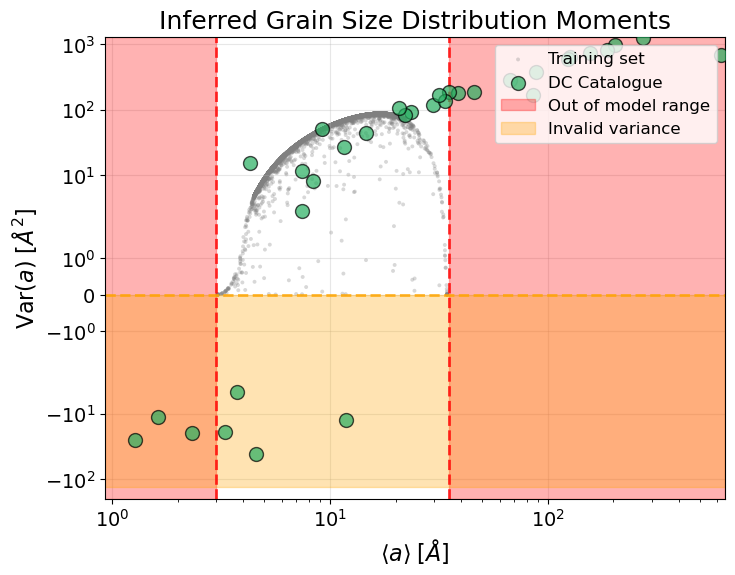

In [40]:
# Make the scatter plot of the first two moments
plt.figure(figsize=(8, 6))

# First, plot the training set as a light background
plt.scatter(a_moments_training_transformed[:, 0], a_moments_training_transformed[:, 1], 
           color='gray', s=8, alpha=0.3, edgecolors='none', 
           label='Training set', zorder=1)

# Then plot the main data points on top
plt.scatter(DC_catelogue_a_moments[:, 0], DC_catelogue_a_moments[:, 1], 
           color='#27AE60', s=100, alpha=0.7, edgecolors='k', 
           label='DC Catalogue', zorder=3)

# Add shading for invalid regions
ax = plt.gca()

# Convert a_min and a_max to Angstrom units (multiply by 1e8)
a_min_angstrom = a_min * 1e8
a_max_angstrom = a_max * 1e8

# Get current axis limits for shading
xlims = ax.get_xlim()
ylims = ax.get_ylim()

# Shade region below a_min (left side)
ax.axvspan(xlims[0], a_min_angstrom, alpha=0.3, color='red', 
          label='Out of model range', zorder=2)

# Shade region above a_max (right side) 
ax.axvspan(a_max_angstrom, xlims[1], alpha=0.3, color='red', 
        #   label='Above $a_{max}$', 
          zorder=2)

# Shade region below y=0 (negative variance - unphysical)
ax.axhspan(ylims[0], 0, alpha=0.3, color='orange', 
          label='Invalid variance', zorder=2)

# Add vertical lines to mark boundaries
ax.axvline(a_min_angstrom, color='red', linestyle='--', alpha=0.8, linewidth=2, zorder=2)
ax.axvline(a_max_angstrom, color='red', linestyle='--', alpha=0.8, linewidth=2, zorder=2)
ax.axhline(0, color='orange', linestyle='--', alpha=0.8, linewidth=2, zorder=2)

# Labels and formatting
plt.xlabel(r'$\langle a \rangle \; [\AA]$', fontsize=16)
plt.xscale('log')
plt.xlim(xlims[0], xlims[1])
plt.yscale('symlog')
plt.ylabel(r'Var$(a)$ [$\AA^2$]', fontsize=16)
plt.title('Inferred Grain Size Distribution Moments', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='both', labelsize=14)

# Add legend with proper ordering
plt.legend(loc='upper right', fontsize=12)

plt.savefig("DC_inferred_size_distribution_moments_v2.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [41]:
Hii_catalogue = [
    [43.3, 0.57],
    [22.1, 0.57],
    [21.5, 0.60],
    [28.4, 0.57],
    [26.6, 0.62],
    [20.7, 0.70],
    [24.1, 0.57],
    [62.0, 0.84],
    [42.4, 0.44],
    [23.4, 0.55],
    [19.0, 0.75],
    [22.5, 0.70],
    [48.6, 0.69],
    [22.3, 0.68]
]

MC_catalogue = [[21.3, 0.53], 
                [24.3, 0.78],
                [18.9, 0.46],
                [15.3, 0.59],
                [17.5, 0.57],
                [17.8, 0.47],
                [32.6, 0.65],
                [23.4, 0.51],
                [20.3, 0.60],
                [25.4, 0.72],
                [18.8, 0.58],
                [19.4, 0.68],
                [19.6, 0.89],
                [24.8, 0.48],
                [21.3, 0.62],
                [23.0, 0.50],
                [18.4, 0.58],
                [20.3, 0.57],
                [28.9, 0.53],
                [28.2, 0.53]]

DC_catalogue = [[25.7, 0.59], 
                [18.3, 0.58],
                [16.5, 0.70],
                [21.8, 0.57],
                [18.2, 0.64],
                [18.7, 0.66],
                [21.7, 0.68],
                [22.7, 0.66],
                [23.3, 0.54],
                [21.7, 0.57],
                [26.2, 0.54],
                [20.2, 0.59],
                [14.7, 0.52],
                [16.4, 0.68],
                [24.4, 0.49],
                [26.7, 0.64],
                [16.3, 0.52],
                [18.4, 0.64],
                [20.8, 0.64],
                [23.4, 0.41],
                [19.6, 0.89],
                [18.3, 0.43],
                [19.1, 0.53],
                [20.1, 0.59],
                [19.8, 0.64],
                [22.4, 0.47],
                [20.9, 0.57],
                [26.6, 0.59],
                [19.1, 0.51],
                [18.1, 0.54],
                [27.1, 0.96],
                [25.2, 0.58],
                [23.5, 0.49],
                [23.7, 0.45],
                [25.1, 0.65],
                [19.4, 0.52],
                [20.7, 0.69],
                [17.8, 0.47],
                [20.3, 0.68],
                [24.2, 0.49]
                ]

DC_catalogue = np.array(DC_catalogue)

MC_catalogue = np.array(MC_catalogue)

Hii_catalogue = np.array(Hii_catalogue)

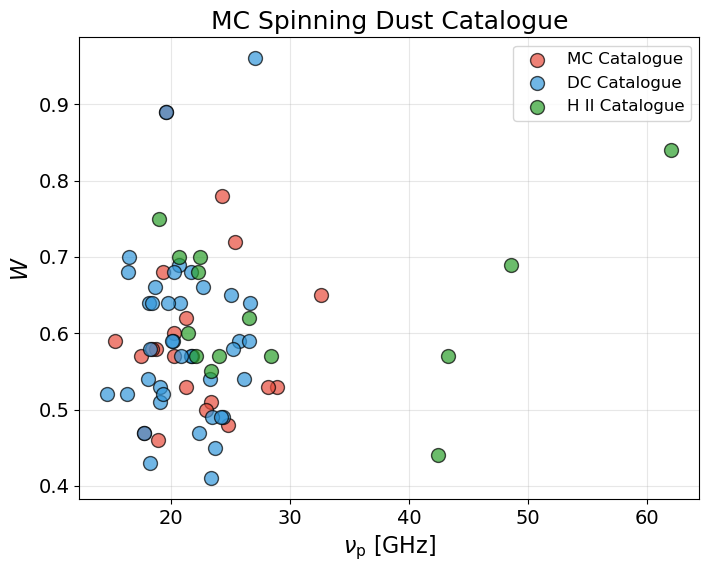

In [42]:
# Make the scatter plot
plt.figure(figsize=(8, 6))

# # First, plot the training set features as light background
# plt.scatter(np.exp(features_training[:, 0]), features_training[:, 1], 
#            color='lightgray', s=18, alpha=0.9, edgecolors='none', 
#            label='Model Sample', zorder=1)

# Then plot the MC catalogue on top
plt.scatter(MC_catalogue[:, 0], MC_catalogue[:, 1], 
           color='#E74C3C', s=100, alpha=0.7, edgecolors='k',
           label='MC Catalogue', zorder=2)

plt.scatter(DC_catalogue[:, 0], DC_catalogue[:, 1], 
           color='#3498DB', s=100, alpha=0.7, edgecolors='k',
           label='DC Catalogue', zorder=3)

plt.scatter(Hii_catalogue[:, 0], Hii_catalogue[:, 1], 
           color='#2ca02c', 
           s=100, alpha=0.7, edgecolors='k',
           label='H II Catalogue', zorder=4)

plt.xlabel(r'$\nu_{\rm p}$ [GHz]', fontsize=16)
plt.ylabel(r'$W$', fontsize=16)
plt.title('MC Spinning Dust Catalogue', fontsize=18)
plt.grid(True, alpha=0.3)
plt.tick_params(axis='both', which='both', labelsize=14)

# Add legend
plt.legend(loc='upper right', fontsize=12, framealpha=0.8)

plt.savefig("MC_spinning_dust_catalogue.pdf", dpi=300, bbox_inches='tight')
plt.show()